<img src='./img/egu21_logo.png' alt='Logo EU Copernicus EUMETSAT' align='left' width='25%'></img><img src='./img/atmos_logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='65%'></img></span>

<br>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./12_CAMS_global_forecast_duaod_exercise_solution.ipynb"><< 12 - CAMS Global forecast - Dust AOD - Exercise Solution</a><span style="float:right;"><a href="./14_Sentinel-5P_TROPOMI_AI_L2_exercise_solution.ipynb">14 - Sentinel-5P TROPOMI AI Level 2 - Exercise Soluton >></a></span>

<div class="alert alert-block alert-info">
<b>EXERCISE WORKBOOK</b>
</div>

<hr>

# CAMS - European Air Quality Forecasts and Analyses - Dust concentration

This notebook is an `exercise workbook` which allows you to practise the preparation of CAMS European Air Quality Forecasts and Analyses `dust concentration` data to analyse a dust event at the beginning of February 2021.

### How it works

This exercise workbook consists of two types of exercises:

#### Coding assignments
Coding assignments ask you to fill an empty code cell with code.
You recognise `coding assignments` as the yellow-coloured boxes.

<div class="alert alert-block alert-warning">
<b>Coding assignment</b>
</div>

#### Questions

Questions ask you to reflect on a result and output. `Questions` are provided as green-coloured boxes.

<div class="alert alert-block alert-success">
<b>Question</b>
</div>

<br>

### Outline

* [1 - Load and browse dust aerosol optical depth (AOD) at 550nm of the CAMS global near-real-time forecast](#load_browse)
* [2 - Retrieve the data variable dust AOD at 550nm as xarray.DataArray](#data_retrieve)
* [3 - Visualize dust AOD at 550nm](#visualize)
* [4 - Create a geographical subset for Europe](#subset)

<hr>

#### Load required libraries

In [2]:
%matplotlib inline
import os
import xarray as xr
import numpy as np
import netCDF4 as nc
import pandas as pd

from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.cm import get_cmap
from matplotlib import animation
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh
from datetime import datetime

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

#### Load helper functions

In [1]:
%run ./functions.ipynb

<hr>

### <a id='load_browse'></a>Load and browse `CAMS European Air Quality forecast and analyses` data

CAMS global near-real-time forecast data is available either in `GRIB` or `netCDF`. The data for the present example has been downloaded in the `netCDF` format. See an example how to download  

You can use xarray's function `xr.open_dataset()` to open the netCDF file as `xarray.Dataset`. 

In [3]:
file = xr.open_dataset('./eodata/cams/near_real_time/2021/02/05/20210205-10_regional_nrt_dust_concentation.nc')
file


<xarray.Dataset>
Dimensions:    (latitude: 416, level: 1, longitude: 693, time: 24)
Coordinates:
  * longitude  (longitude) float32 335.75 335.85 335.95 ... 44.75 44.85 44.95
  * latitude   (latitude) float32 71.55 71.45 71.35 71.25 ... 30.25 30.15 30.05
  * level      (level) float32 1000.0
  * time       (time) timedelta64[ns] 0 days 00:00:00 ... 5 days 18:00:00
Data variables:
    dust       (time, level, latitude, longitude) float32 ...
Attributes:
    title:        Dust Air Pollutant ANALYSIS at 1 levels
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20210205-20210210+[0H_18H]
    summary:      ENSEMBLE model hourly ANALYSIS of Dust concentration at 1 l...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

<br>

<div class="alert alert-block alert-success">
<b>Question:</b><br>

Inspect the loaded `xarray.Dataset`:
- How many dimensions does the data array have?
- What data variables does the xarray.Dataset offer?
</div>

**Response**

The data above has four dimensions (`latitude`, `longitude`, `level` and `time`) and one data variable:
* `dust`: Dust Air Pollutant

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the coordinate <b>time</b> from the xarray.Dataset <i>file</i>.
</div>

In [7]:
# Enter your solution here








In [4]:
file.time

<xarray.DataArray 'time' (time: 24)>
array([              0,  21600000000000,  43200000000000,  64800000000000,
        86400000000000, 108000000000000, 129600000000000, 151200000000000,
       172800000000000, 194400000000000, 216000000000000, 237600000000000,
       259200000000000, 280800000000000, 302400000000000, 324000000000000,
       345600000000000, 367200000000000, 388800000000000, 410400000000000,
       432000000000000, 453600000000000, 475200000000000, 496800000000000],
      dtype='timedelta64[ns]')
Coordinates:
  * time     (time) timedelta64[ns] 0 days 00:00:00 ... 5 days 18:00:00
Attributes:
    long_name:  ANALYSIS time from 20210205

Let us convert the time information into a human-readable time format.

First, from the `long_name` information of the time dimension, we can retrieve the initial timestamp. With the function `strptime()` from Python's `datetime` library, we can convert it into a `datetime.datetime` object.

In [5]:
timestamp = file.time.long_name[19:27]

timestamp_init=datetime.strptime(timestamp,'%Y%m%d' )
timestamp_init

datetime.datetime(2021, 2, 5, 0, 0)

In a next step, we then build a `DateTimeIndex` object with the help of Panda's `date_range()` function, making use of the length of time dimension.

The result is a `DateTimeIndex` object, which can be used to newly assign the time coordinate information.

In [6]:
time_coords = pd.date_range(timestamp_init, periods=len(file.time), freq='6h').strftime("%Y-%m-%d %H:%M:%S").astype('datetime64[ns]')
time_coords


DatetimeIndex(['2021-02-05 00:00:00', '2021-02-05 06:00:00',
               '2021-02-05 12:00:00', '2021-02-05 18:00:00',
               '2021-02-06 00:00:00', '2021-02-06 06:00:00',
               '2021-02-06 12:00:00', '2021-02-06 18:00:00',
               '2021-02-07 00:00:00', '2021-02-07 06:00:00',
               '2021-02-07 12:00:00', '2021-02-07 18:00:00',
               '2021-02-08 00:00:00', '2021-02-08 06:00:00',
               '2021-02-08 12:00:00', '2021-02-08 18:00:00',
               '2021-02-09 00:00:00', '2021-02-09 06:00:00',
               '2021-02-09 12:00:00', '2021-02-09 18:00:00',
               '2021-02-10 00:00:00', '2021-02-10 06:00:00',
               '2021-02-10 12:00:00', '2021-02-10 18:00:00'],
              dtype='datetime64[ns]', freq=None)

<div class="alert alert-block alert-success">
<b>Question:</b><br>
    
How many hours does each timestep have in the loaded `xarray.DataArray`?
</div>

**Response**

Each timestep has `6` hours.

<br>

The final step is to assign the pandas time series object `time_coords` to the `file` DataArray object. You can use the `assign_coords()` function from xarray.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Enter below the code which assigns the time series object `time_coords` as the time coordinate to the `xarray.DataArray` `file`. Save it as a new variable called `file_assigned`. <br>You can use the `assign_coords()` function from the xarray library to do so.
</div>

In [55]:
# Enter your solution here








In [7]:
file_assigned = file.assign_coords(time=time_coords)
file_assigned

<xarray.Dataset>
Dimensions:    (latitude: 416, level: 1, longitude: 693, time: 24)
Coordinates:
  * longitude  (longitude) float32 335.75 335.85 335.95 ... 44.75 44.85 44.95
  * latitude   (latitude) float32 71.55 71.45 71.35 71.25 ... 30.25 30.15 30.05
  * level      (level) float32 1000.0
  * time       (time) datetime64[ns] 2021-02-05 ... 2021-02-10T18:00:00
Data variables:
    dust       (time, level, latitude, longitude) float32 ...
Attributes:
    title:        Dust Air Pollutant ANALYSIS at 1 levels
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20210205-20210210+[0H_18H]
    summary:      ENSEMBLE model hourly ANALYSIS of Dust concentration at 1 l...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

<div class="alert alert-block alert-success">
<b>Question:</b><br>
    
Can you identify the resolution of the loaded `xarray.DataArray`?
</div>

**Response:**<br>
From the `longitude` and `latidue` coordinates, you can see that the daily gridded data are on a 0.1 deg x 0.1 deg data grid, with 416 latitude values and 693 longitude values.

<br>

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the coordinate <b>latitude</b> from the xarray.Dataset <i>file_assigned</i>.
</div>

In [57]:
# Enter your solution here








In [8]:
file_assigned.latitude

<xarray.DataArray 'latitude' (latitude: 416)>
array([71.55, 71.45, 71.35, ..., 30.25, 30.15, 30.05], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 71.55 71.45 71.35 71.25 ... 30.25 30.15 30.05
Attributes:
    long_name:  latitude
    units:      degrees_north

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the coordinate <b>longitude</b> from the xarray.Dataset <i>file_assigned</i>.
</div>

In [59]:
# Enter your solution here








In [9]:
file_assigned.longitude

<xarray.DataArray 'longitude' (longitude: 693)>
array([335.75, 335.85, 335.95, ...,  44.75,  44.85,  44.95], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 335.75 335.85 335.95 ... 44.75 44.85 44.95
Attributes:
    long_name:  longitude
    units:      degrees_east

<div class="alert alert-block alert-success">
<b>Question:</b><br>
    
Are the longitude values on a [-180,180] or a [0,360] grid?
</div>

**Response**<br> The longitude values are on a [0,360] grid instead of a [-180,180] grid. 

<br>

### <a id='shift'></a>Bring longitude coordinates onto a [-180,180] grid

You can assign new values to coordinates in an `xarray.Dataset`. You can do so with the `assign_coords()` function, which you can apply onto a `xarray.Dataset`. With the code below, you shift your longitude grid from [0,360] to [-180,180]. At the end, you sort the longitude values in an ascending order.

In [10]:
file_grid = file_assigned.assign_coords(longitude=(((file_assigned.longitude + 180) % 360) - 180)).sortby('longitude')
file_grid

<xarray.Dataset>
Dimensions:    (latitude: 416, level: 1, longitude: 693, time: 24)
Coordinates:
  * longitude  (longitude) float32 -24.25 -24.150024 ... 44.850006 44.949997
  * latitude   (latitude) float32 71.55 71.45 71.35 71.25 ... 30.25 30.15 30.05
  * level      (level) float32 1000.0
  * time       (time) datetime64[ns] 2021-02-05 ... 2021-02-10T18:00:00
Data variables:
    dust       (time, level, latitude, longitude) float32 ...
Attributes:
    title:        Dust Air Pollutant ANALYSIS at 1 levels
    institution:  Data produced by Meteo France
    source:       Data from ENSEMBLE model
    history:      Model ENSEMBLE ANALYSIS
    ANALYSIS:     Europe, 20210205-20210210+[0H_18H]
    summary:      ENSEMBLE model hourly ANALYSIS of Dust concentration at 1 l...
    project:      MACC-RAQ (http://macc-raq.gmes-atmosphere.eu)

<br>

A quick check of the longitude coordinates of the new `xarray.Dataset` shows you that the longitude values range now between [-180, 180].

In [11]:
file_grid.longitude

<xarray.DataArray 'longitude' (longitude: 693)>
array([-24.25    , -24.150024, -24.049988, ...,  44.75    ,  44.850006,
        44.949997], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -24.25 -24.150024 ... 44.850006 44.949997

### <a id='data_retrieve'></a>Retrieve the data variable `dust` as xarray.DataArray

Let us store the data variable `dust concentration` as `xarray.DataArray` with the name `dust`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the data variable <b>dust</b> from the xarray.Dataset <i>file_grid</i> and call it <b>dust</b> 
</div>

In [63]:
# Enter your solution here








In [12]:
dust = file_grid.dust
dust

<xarray.DataArray 'dust' (time: 24, level: 1, latitude: 416, longitude: 693)>
[6918912 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 -24.25 -24.150024 ... 44.850006 44.949997
  * latitude   (latitude) float32 71.55 71.45 71.35 71.25 ... 30.25 30.15 30.05
  * level      (level) float32 1000.0
  * time       (time) datetime64[ns] 2021-02-05 ... 2021-02-10T18:00:00
Attributes:
    species:        Dust
    units:          µg/m3
    value:          hourly values
    standard_name:  mass_concentration_of_dust_in_air

<br>

Above, you see that the variable `dust` has four attributes, `species`, `units`, `value` and `standard_name`. Let us define variables for `unit` and `standard_name` attributes. The variables can be used for visualizing the data.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the attribute <b>long_name</b> from the xarray.Dataset <i>dust</i> and call it <b>long_name</b>. Then, select the attribute <b>units</b> from the xarray.Dataset <i>dust</i> and call it <b>units</b>.
</div>

In [65]:
# Enter your solution here








In [13]:
long_name = dust.standard_name
units = dust.units

<br>

Let us do the same for the coordinates `longitude` and `latitude`.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>
   Enter below the code which selects the attribute <b>latitude</b> from the xarray.Dataset <i>dust</i> and call it <b>latitude</b>. Then, select the attribute <b>longitude</b> from the xarray.Dataset <i>dust</i> and call it <b>longitude</b>.
</div>

In [67]:
# Enter your solution here








In [14]:
latitude = dust.latitude
longitude = dust.longitude

<br>

### <a id='visualize'></a>Visualize `dust` concentration

The next step is to visualize the Dust Concentration data for one time step.

<div class="alert alert-block alert-warning">
<b>Coding assignment:</b><br>

Make use of the function [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh) in order to visualize the xarray.DataArray <code>dust</code>. <br>
    
The following kwargs have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color_scale`
* `unit`
* `longname`
* `vmin`,
* `vmax`,
* `lonmin`, `lonmax`, `latmin`, `latmax`
* `set_global`
    
**HINT**: 
* With `?visualize_pcolormesh` you can open the function's docstring to see what keyword arguments are needed to prepare your plot
* You can use `YlGn` as color map, `ccrs.PlateCarree()` as projection
* Try to add the time information as part of the title. Add the string of the datetime information to the `longname` variable: `long_name + ' on ' +str(dust.time[0].dt.strftime('%Y-%m-%d').data)`.
* Try using `0` for the vmin and `300` for the vmax. 
* Make sure to set the `set_global` kwarg to `False` 
* You can set the latitude and longitude bounding box to their respective minimum and maximum values. For example, you can set `lonmin=longitude.min().data` and `latmax=latitude.max().data`.

</div>

In [69]:
# Enter your solution here








(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'mass_concentration_of_dust_in_air on 2021-02-06'}>)

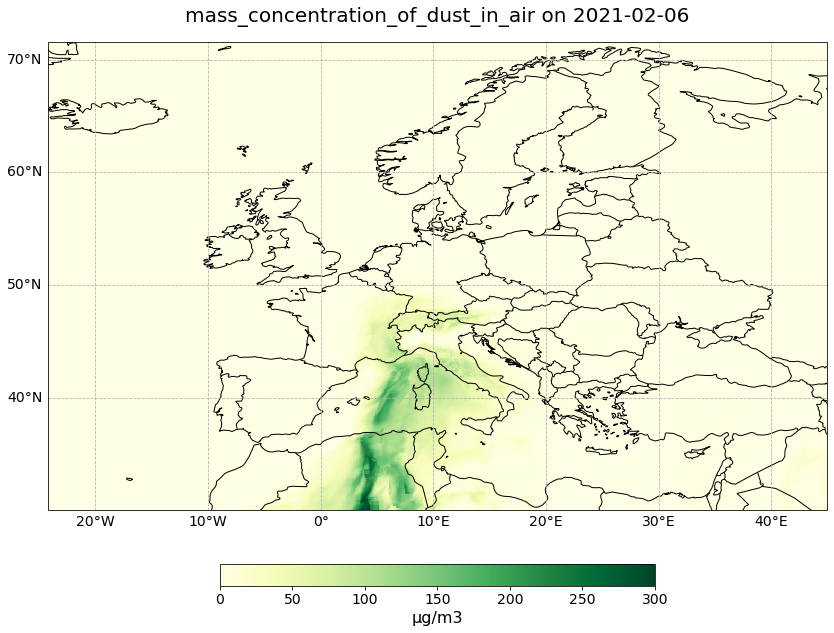

In [15]:
visualize_pcolormesh(data_array=dust[7,0,:,:],
                     longitude=longitude,
                     latitude=latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='YlGn',
                     unit=units,
                     long_name=long_name + ' on ' +str(dust.time[7].dt.strftime('%Y-%m-%d').data),
                     vmin=0, 
                     vmax=300,
                     lonmin=longitude.min().data,
                     lonmax=longitude.max().data,
                     latmin=latitude.min().data,
                     latmax=latitude.max().data,
                     set_global=False)

<br>

<br>

<a href="./00_index.ipynb"><< Index</a><br>
<a href="./12_CAMS_global_forecast_duaod_exercise_solution.ipynb"><< 12 - CAMS Global forecast - Dust AOD - Exercise Solution</a><span style="float:right;"><a href="./14_Sentinel-5P_TROPOMI_AI_L2_exercise_solution.ipynb">14 - Sentinel-5P TROPOMI AI Level 2 - Exercise Soluton >></a></span>

<hr>

<img src='../../img/copernicus_logo.png' alt='Logo EU Copernicus' align='right' width='20%'><br><br><br><br>

<p style="text-align:right;">This project is licensed under the <a href="./LICENSE">MIT License</a> and is developed under a Copernicus contract.